# Application Question

The demo data set for this part is the Wesenheit index of the OGLE-III fundamental-mode and first overtone classical Cepheids. 

These stars are awesome because you can use them to measure distances. Here's a nice [youtube video](https://www.youtube.com/watch?v=iyisAjHdhas) on these stars.

You'll try to estimate their period-luminosity relationship. 

The Wesenheit index is defined as `W = I - 1.55(V - I)`, and its main advantage over using simply the I or V photometry is that it is insensitive to extinction. It is denoted by 'W' among the data columns. 

Other columns are 'name', the identifier of the star; 'RA0' (in decimal hours) and 'Decl0' (in decimal degrees), celestial coordinates; 'Mode', the mode of the Cepheid ('F' indicates fundamental-mode, '1' indicates first overtone star); 'Cloud', indicating which Magellanic Cloud the star belongs to; 'logP1', the base-10 logarithm of the period in days; 'VI', the colour V-I.

We split the data into LMC and SMC, and then again by mode F and 1 (for you) below:

In [26]:
import pandas as pd
# read in the csv data file using Pandas
cep = pd.read_csv("data/Cepheids.csv")
print(cep.columns)

Index(['name', 'RA0', 'Decl0', 'Mode', 'Cloud', 'W', 'logP1', 'VI'], dtype='object')


In [27]:
#select Cepheids belonging to the LMC and SMC clouds with F and 1 modes
lmcf = cep[(cep['Cloud'] == 'LMC') & (cep['Mode'] == 'F')]
smcf = cep[(cep['Cloud'] == 'SMC') & (cep['Mode'] == 'F')]

lmco = cep[(cep['Cloud'] == 'LMC') & (cep['Mode'] == '1')]
smco = cep[(cep['Cloud'] == 'SMC') & (cep['Mode'] == '1')]

In [28]:
lmcf.head()

,name,RA0,Decl0,Mode,Cloud,W,logP1,VI
0,OGLE-LMC-CEP-0002,4.529733,-69.81933,F,LMC,14.52500,0.493893,0.740
1,OGLE-LMC-CEP-0005,4.592089,-69.73497,F,LMC,13.49540,0.749122,0.752
2,OGLE-LMC-CEP-0012,4.630203,-67.21442,F,LMC,14.54210,0.424912,0.598
3,OGLE-LMC-CEP-0016,4.642367,-67.64631,F,LMC,12.03300,1.021456,1.080
4,OGLE-LMC-CEP-0017,4.649119,-69.68839,F,LMC,14.34215,0.565524,0.647


## Part 1: plot the `W` on the y-axis vs `log(P1)` on x.

In [29]:
# YOUR CODE HERE

In [30]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
x1 = lmcf['logP1']
y1 = lmcf['W']
x2 = smcf['logP1']
y2 = smcf['W']
x3 = lmco['logP1']
y3 = lmco['W']
x4 = smco['logP1']
y4 = smco['W']

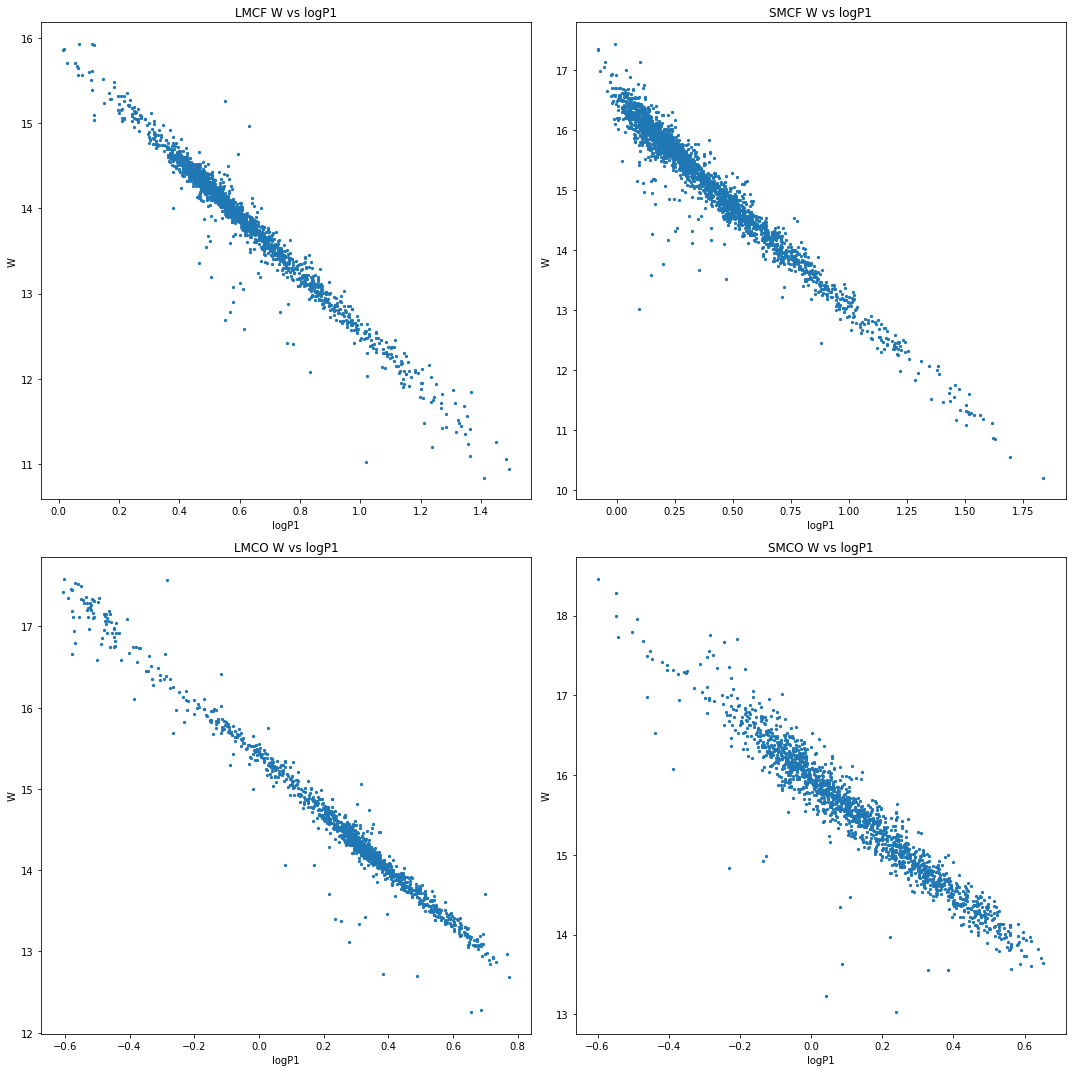

In [32]:
fig, ax = plt.subplots(2, 2,figsize=(15,15))
ax[0][0].scatter(x1,y1,s=5)
ax[0][0].set_title("LMCF W vs logP1")
ax[0][0].set_xlabel("logP1")
ax[0][0].set_ylabel("W")
ax[0][1].scatter(x2,y2,s=5)
ax[0][1].set_title("SMCF W vs logP1")
ax[0][1].set_xlabel("logP1")
ax[0][1].set_ylabel("W")
ax[1][0].scatter(x3,y3,s=5)
ax[1][0].set_title("LMCO W vs logP1")
ax[1][0].set_xlabel("logP1")
ax[1][0].set_ylabel("W")
ax[1][1].scatter(x4,y4,s=5)
ax[1][1].set_title("SMCO W vs logP1")
ax[1][1].set_xlabel("logP1")
ax[1][1].set_ylabel("W")

os.makedirs("plots", exist_ok=True)
fig.tight_layout()
plt.savefig("plots/W_vs_logP1.jpg")
plt.show()

## Part 2: Fit or estimate straight lines to each of the four samples
Note: You can use any fitting function/algorithm you like (i.e. statsmodels, astropy, scipy, numpy, etc..).

In [33]:
# YOUR CODE HERE

In [34]:
from numpy.polynomial.polynomial import polyfit
from sklearn.metrics import r2_score

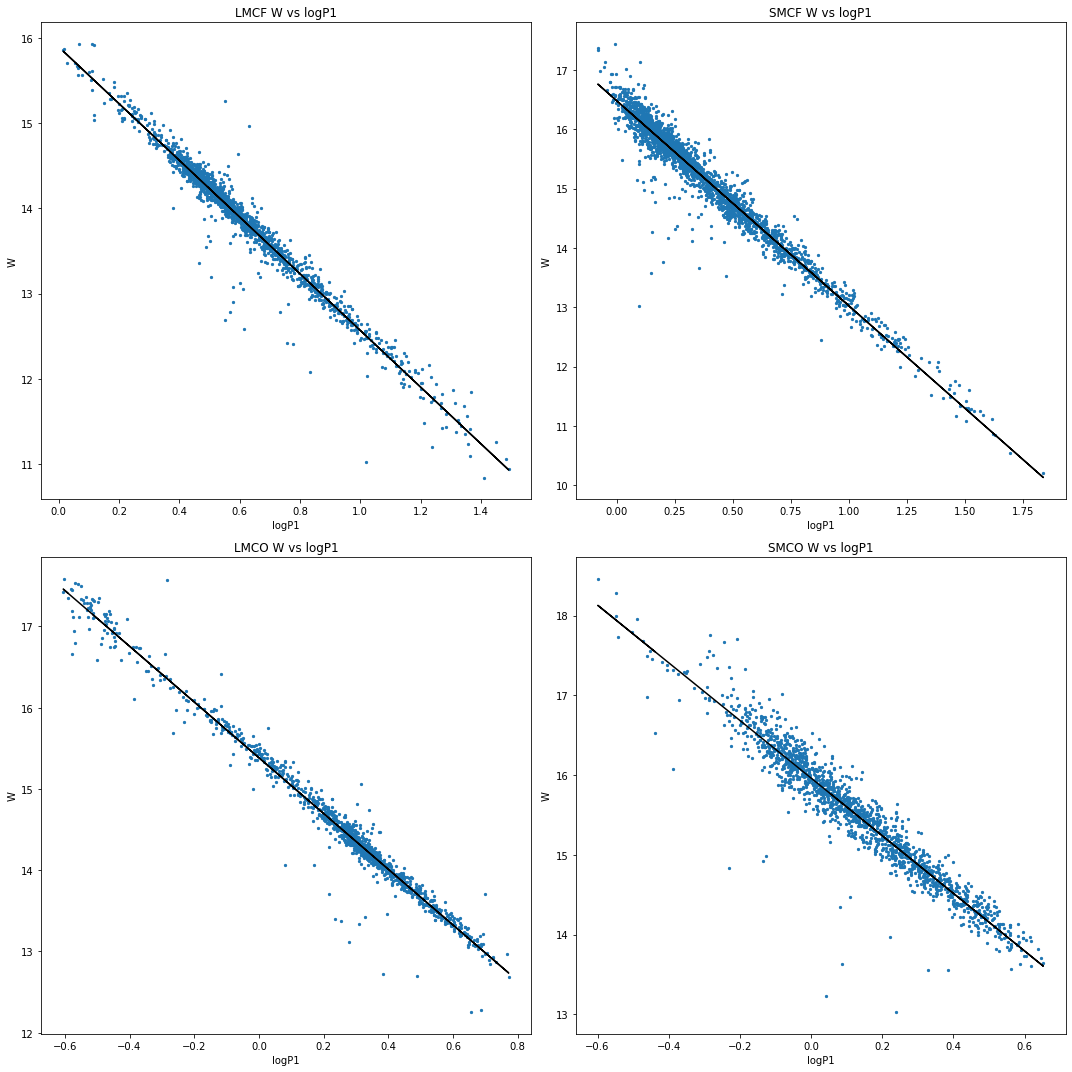

In [35]:
fig, ax = plt.subplots(2, 2,figsize=(15,15))

ax1 = ax[0][0]
b1, m1 = polyfit(x1, y1, 1)
ax1.scatter(x1,y1,s=5)
ax1.plot(x1, b1 + m1 * x1, '-', color='k')
ax1.set_title("LMCF W vs logP1")
ax1.set_xlabel("logP1")
ax1.set_ylabel("W")

ax2 = ax[0][1]
b2, m2 = polyfit(x2, y2, 1)
ax2.scatter(x2,y2,s=5)
ax2.plot(x2, b2 + m2 * x2, '-', color='k')
ax2.set_title("SMCF W vs logP1")
ax2.set_xlabel("logP1")
ax2.set_ylabel("W")

ax3 = ax[1][0]
b3, m3 = polyfit(x3, y3, 1)
ax3.scatter(x3,y3,s=5)
ax3.plot(x3, b3 + m3 * x3, '-', color='k')
ax3.set_title("LMCO W vs logP1")
ax3.set_xlabel("logP1")
ax3.set_ylabel("W")

ax4 = ax[1][1]
b4, m4 = polyfit(x4, y4, 1)
ax4.scatter(x4,y4,s=5)
ax4.plot(x4, b4 + m4 * x4, '-', color='k')
ax4.set_title("SMCO W vs logP1")
ax4.set_xlabel("logP1")
ax4.set_ylabel("W")

os.makedirs("plots", exist_ok=True)
fig.tight_layout()
plt.savefig("plots/W_vs_logP1_line.jpg")
plt.show()

Find R2 Scores

In [36]:
# # Find r2 scores
# b1, m1 = polyfit(x1, y1, 1)
# r2_1 = r2_score(y1, b1 + m1 * x1)

# b2, m2 = polyfit(x2, y2, 1)
# r2_2 = r2_score(y2, b2 + m2 * x2)

# b3, m3 = polyfit(x3, y3, 1)
# r2_3 = r2_score(y3, b3 + m3 * x3)

# b4, m4 = polyfit(x4, y4, 1)
# r2_4 = r2_score(y4, b4 + m4 * x4)

# print("LMCF R2 Score:",r2_1)
# print("SMCF R2 Score:",r2_2)
# print("LMCO R2 Score:",r2_3)
# print("SMCO R2 Score:",r2_4)    

# # Annotate R2 scores on respective plots
# fig, ax = plt.subplots(2, 2,figsize=(15,15))

# ax1 = ax[0][0]
# b1, m1 = polyfit(x1, y1, 1)
# r2_1 = r2_score(y1, b1 + m1 * x1)
# ax1.scatter(x1,y1,s=5)
# ax1.plot(x1, b1 + m1 * x1, '-', color='k')
# ax1.annotate("r2 = {:.3f}".format(r2_1), (0.37, 0.92), xycoords='figure fraction')
# ax1.set_title("LMCF W vs logP1")
# ax1.set_xlabel("logP1")
# ax1.set_ylabel("W")

# ax2 = ax[0][1]
# b2, m2 = polyfit(x2, y2, 1)
# r2_2 = r2_score(y2, b2 + m2 * x2)
# ax2.scatter(x2,y2,s=5)
# ax2.plot(x2, b2 + m2 * x2, '-', color='k')
# ax2.annotate("r2 = {:.3f}".format(r2_2), (0.87, 0.92), xycoords='figure fraction')
# ax2.set_title("SMCF W vs logP1")
# ax2.set_xlabel("logP1")
# ax2.set_ylabel("W")

# ax3 = ax[1][0]
# b3, m3 = polyfit(x3, y3, 1)
# r2_3 = r2_score(y3, b3 + m3 * x3)
# ax3.scatter(x3,y3,s=5)
# ax3.plot(x3, b3 + m3 * x3, '-', color='k')
# ax3.annotate("r2 = {:.3f}".format(r2_3), (0.37, 0.42), xycoords='figure fraction')
# ax3.set_title("LMCO W vs logP1")
# ax3.set_xlabel("logP1")
# ax3.set_ylabel("W")

# ax4 = ax[1][1]
# b4, m4 = polyfit(x4, y4, 1)
# r2_4 = r2_score(y4, b4 + m4 * x4)
# ax4.scatter(x4,y4,s=5)
# ax4.plot(x4, b4 + m4 * x4, '-', color='k')
# ax4.annotate("r2 = {:.3f}".format(r2_4), (0.87, 0.42), xycoords='figure fraction')
# ax4.set_title("SMCO W vs logP1")
# ax4.set_xlabel("logP1")
# ax4.set_ylabel("W")

# plt.show()


## Part 3: Compute the residuals of each sample to its respective line.
Do these residuals look like a normal distribution? If not, speculate on why (WATCH THE YOUTUBE VIDEO!)

In [37]:
# YOUR CODE HERE

`residual_typ` determines the type of residuals to be calculated. It takes one of 3 values: `"square"`, `"abs"`, `"none"`

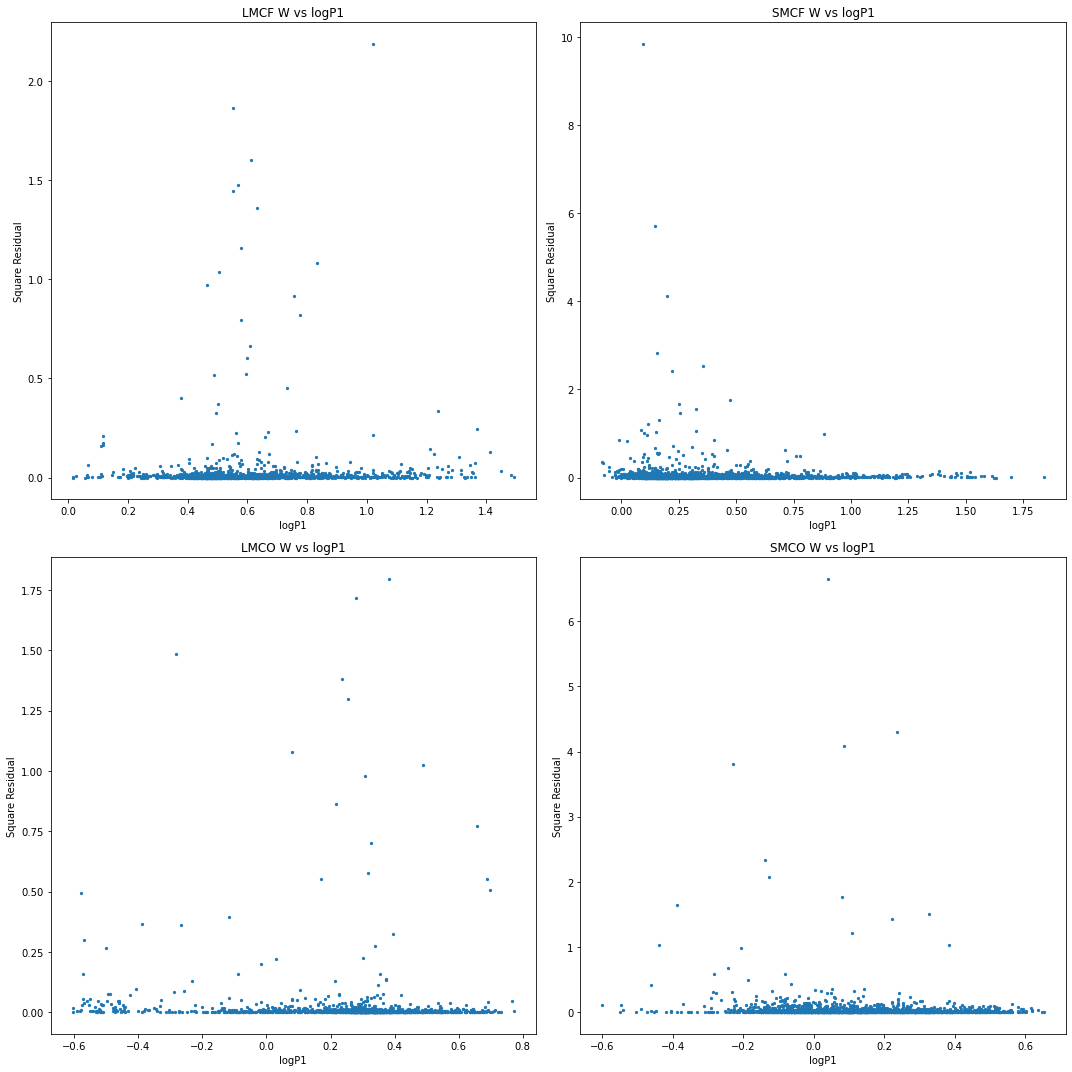

In [38]:
fig, ax = plt.subplots(2, 2,figsize=(15,15))
residual_typ = "square" # choose from ['square', 'abs', "none"]
lookup = {"square": "Square", "abs": "Absolute", "none": ""}


ax1 = ax[0][0]
b1, m1 = polyfit(x1, y1, 1)
y1_pred = b1 + m1 * x1
if residual_typ == 'square':
    y1_res = np.square(y1 - y1_pred)
elif residual_typ == 'abs':
    y1_res = np.abs(y1 - y1_pred)
else:
    y1_res = (y1 - y1_pred)
ax1.scatter(x1, y1_res, s=5)
ax1.set_title("LMCF W vs logP1")
ax1.set_xlabel("logP1")
ax1.set_ylabel(lookup[residual_typ]+" Residual")

ax2 = ax[0][1]
b2, m2 = polyfit(x2, y2, 1)
y2_pred = b2 + m2 * x2
if residual_typ == 'square':
    y2_res = np.square(y2 - y2_pred)
elif residual_typ == 'abs':
    y2_res = np.abs(y2 - y2_pred)
else:
    y2_res = (y2 - y2_pred)
ax2.scatter(x2, y2_res, s=5)
ax2.set_title("SMCF W vs logP1")
ax2.set_xlabel("logP1")
ax2.set_ylabel(lookup[residual_typ]+" Residual")

ax3 = ax[1][0]
b3, m3 = polyfit(x3, y3, 1)
y3_pred = b3 + m3 * x3
if residual_typ == 'square':
    y3_res = np.square(y3 - y3_pred)
elif residual_typ == 'abs':
    y3_res = np.abs(y3 - y3_pred)
else:
    y3_res = (y3 - y3_pred)
ax3.scatter(x3, y3_res, s=5)
ax3.set_title("LMCO W vs logP1")
ax3.set_xlabel("logP1")
ax3.set_ylabel(lookup[residual_typ]+" Residual")

ax4 = ax[1][1]
b4, m4 = polyfit(x4, y4, 1)
y4_pred = b4 + m4 * x4
if residual_typ == 'square':
    y4_res = np.square(y4 - y4_pred)
elif residual_typ == 'abs':
    y4_res = np.abs(y4 - y4_pred)
else:
    y4_res = (y4 - y4_pred)
ax4.scatter(x4, y4_res, s=5)
ax4.set_title("SMCO W vs logP1")
ax4.set_xlabel("logP1")
ax4.set_ylabel(lookup[residual_typ]+" Residual")

os.makedirs("plots", exist_ok=True)
fig.tight_layout()
plt.savefig("plots/Residual_"+lookup[residual_typ]+".jpg")
plt.show()


## Part 4: Scatter plot of the residuals as RA (x-axis) vs Dec (y-axis) color-coded by whether they are positive or negative.
What do you see?

In [39]:
# YOUR CODE HERE

In [40]:
x1 = lmcf['RA0']
y1 = lmcf['Decl0']
x2 = smcf['RA0']
y2 = smcf['Decl0']
x3 = lmco['RA0']
y3 = lmco['Decl0']
x4 = smco['RA0']
y4 = smco['W']

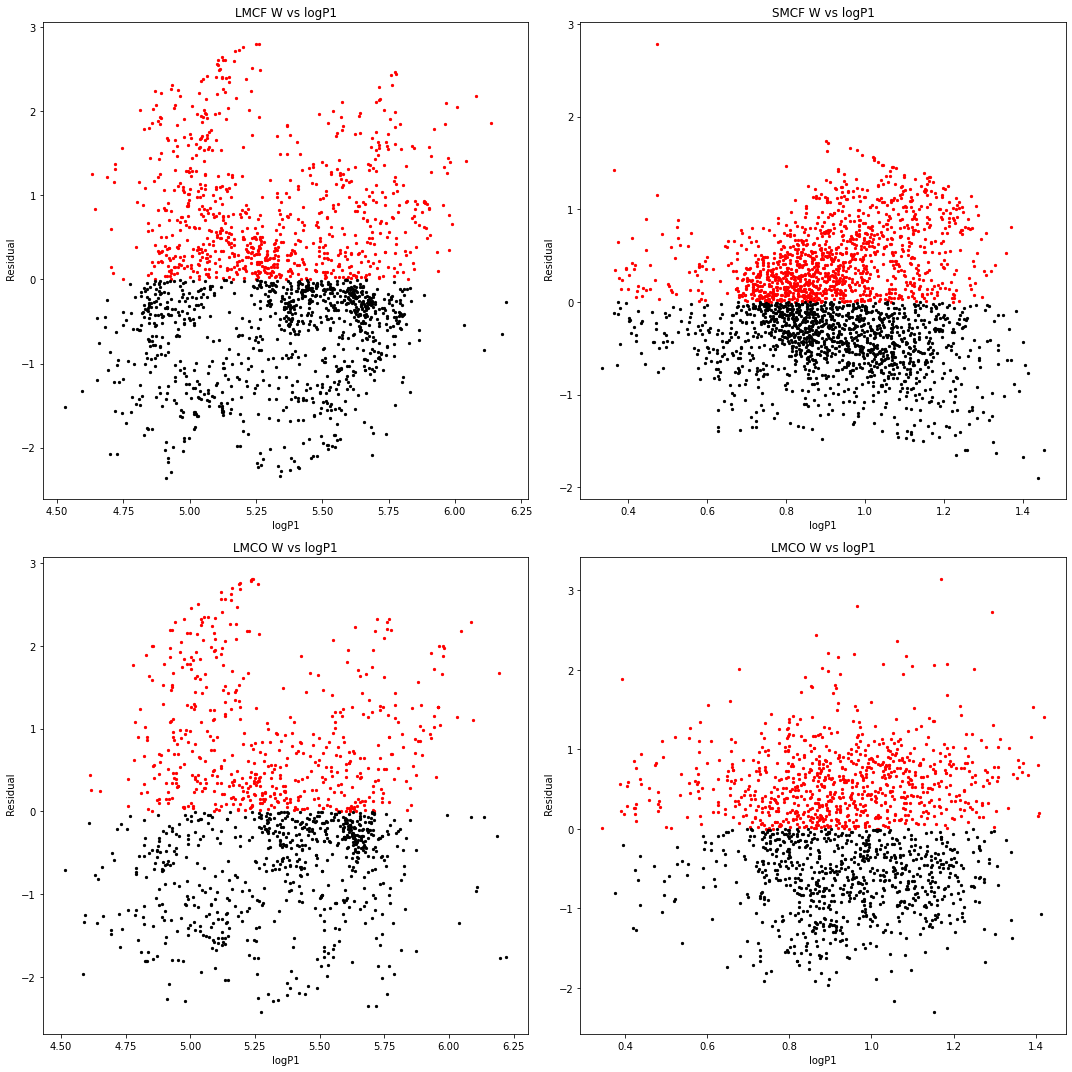

In [41]:
fig, ax = plt.subplots(2, 2,figsize=(15,15))
residual_typ = "none" # choose from ['square', 'abs', 'none']
lookup = {"square": "Square", "abs": "Absolute", "none": ""}


ax1 = ax[0][0]
b1, m1 = polyfit(x1, y1, 1)
y1_pred = b1 + m1 * x1
x1 = np.array(x1)
y1_pred = np.array(y1_pred)
y1_res = y1 - y1_pred
y1_res = np.array(y1_res)
neg_idx = []
pos_idx = []
for idx in range(len(y1_res)):
    if y1_res[idx] < 0:
        neg_idx += [idx]
    else:
        pos_idx += [idx]
if residual_typ == 'square':
    y1_res = np.square(y1 - y1_pred)
elif residual_typ == 'abs':
    y1_res = np.abs(y1 - y1_pred)
ax1.scatter(x1[pos_idx], y1_res[pos_idx], s=5, color='r')
ax1.scatter(x1[neg_idx], y1_res[neg_idx], s=5, color='k')
ax1.set_title("LMCF W vs logP1")
ax1.set_xlabel("logP1")
ax1.set_ylabel(lookup[residual_typ]+" Residual")

####################

ax2 = ax[0][1]
b2, m2 = polyfit(x2, y2, 1)
y2_pred = b2 + m2 * x2
x2 = np.array(x2)
y2_pred = np.array(y2_pred)
y2_res = y2 - y2_pred
y2_res = np.array(y2_res)
neg_idx = []
pos_idx = []
for idx in range(len(y2_res)):
    if y2_res[idx] < 0:
        neg_idx += [idx]
    else:
        pos_idx += [idx]
if residual_typ == 'square':
    y2_res = np.square(y2_res)
elif residual_typ == 'abs':
    y2_res = np.abs(y2_res)
ax2.scatter(x2[pos_idx], y2_res[pos_idx], s=5, color='r')
ax2.scatter(x2[neg_idx], y2_res[neg_idx], s=5, color='k')
ax2.set_title("SMCF W vs logP1")
ax2.set_xlabel("logP1")
ax2.set_ylabel(lookup[residual_typ]+" Residual")

####################

ax3 = ax[1][0]
b3, m3 = polyfit(x3, y3, 1)
y3_pred = b3 + m3 * x3
x3 = np.array(x3)
y3_pred = np.array(y3_pred)
y3_res = y3 - y3_pred
y3_res = np.array(y3_res)
neg_idx = []
pos_idx = []
for idx in range(len(y3_res)):
    if y3_res[idx] < 0:
        neg_idx += [idx]
    else:
        pos_idx += [idx]
if residual_typ == 'square':
    y3_res = np.square(y3_res)
elif residual_typ == 'abs':
    y3_res = np.abs(y3_res)
ax3.scatter(x3[pos_idx], y3_res[pos_idx], s=5, color='r')
ax3.scatter(x3[neg_idx], y3_res[neg_idx], s=5, color='k')
ax3.set_title("LMCO W vs logP1")
ax3.set_xlabel("logP1")
ax3.set_ylabel(lookup[residual_typ]+" Residual")

####################
ax4 = ax[1][1]
b4, m4 = polyfit(x4, y4, 1)
y4_pred = b4 + m4 * x4
x4 = np.array(x4)
y4_pred = np.array(y4_pred)
y4_res = y4 - y4_pred
y4_res = np.array(y4_res)
neg_idx = []
pos_idx = []
for idx in range(len(y4_res)):
    if y4_res[idx] < 0:
        neg_idx += [idx]
    else:
        pos_idx += [idx]
if residual_typ == 'square':
    y4_res = np.square(y4_res)
elif residual_typ == 'abs':
    y4_res = np.abs(y4_res)
ax4.scatter(x4[pos_idx], y4_res[pos_idx], s=5, color='r')
ax4.scatter(x4[neg_idx], y4_res[neg_idx], s=5, color='k')
ax4.set_title("LMCO W vs logP1")
ax4.set_xlabel("logP1")
ax4.set_ylabel(lookup[residual_typ]+" Residual")

os.makedirs("plots", exist_ok=True)
fig.tight_layout()
plt.savefig("plots/Residual_color_"+lookup[residual_typ]+".jpg")
plt.show()
